Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

Reading Dataset

In [2]:
path = '../Date-Wise-Prices-all-Commodity.xlsx'

dataSet = pd.read_excel(path)
dataSet

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,Table6431,6430,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,FAQ,24/02/2023,1400,1500.0,1450.0
6431,Table6432,6431,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Potato,Jyoti,FAQ,24/02/2023,760,800.0,780.0
6432,Table6433,6432,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Common,FAQ,24/02/2023,2700,2900.0,2800.0
6433,Table6434,6433,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Super Fine,FAQ,24/02/2023,4700,4900.0,4800.0


Dataset Description

In [3]:
dataSet.info()
print('\n','-'*150,'\n')
dataSet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diffgr:id          6435 non-null   object 
 1   msdata:rowOrder    6435 non-null   int64  
 2   State              6435 non-null   object 
 3   District           6435 non-null   object 
 4   Market             6435 non-null   object 
 5   Commodity          6435 non-null   object 
 6   Variety            6435 non-null   object 
 7   Grade              6435 non-null   object 
 8   Arrival_Date       6435 non-null   object 
 9   Min_x0020_Price    6435 non-null   int64  
 10  Max_x0020_Price    6435 non-null   float64
 11  Modal_x0020_Price  6435 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 603.4+ KB

 ------------------------------------------------------------------------------------------------------------------------------------------------------ 



,msdata:rowOrder,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
count,6435.000000,6435.000000,6435.000000,6435.000000
mean,3217.000000,4107.969231,4676.000738,4415.979705
std,1857.768823,20324.137126,23998.000980,22159.552059
min,0.000000,0.000000,0.000000,3.000000
25%,1608.500000,1200.000000,1420.000000,1300.000000
50%,3217.000000,2300.000000,2600.000000,2500.000000
75%,4825.500000,4400.000000,5000.000000,4607.500000
max,6434.000000,800000.000000,1000000.000000,900000.000000


In [4]:
dataSet.isnull().sum()

diffgr:id            0
msdata:rowOrder      0
State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Arrival_Date         0
Min_x0020_Price      0
Max_x0020_Price      0
Modal_x0020_Price    0
dtype: int64

Outliers Visualisation

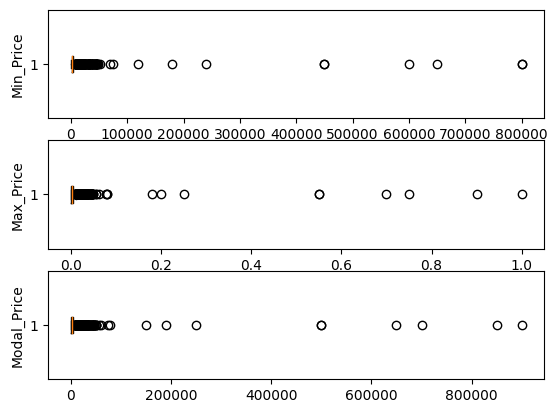

In [5]:
fig,axs = plt.subplots(3,1)

axs[0].boxplot(dataSet['Min_x0020_Price'], vert=False)
axs[0].set_ylabel('Min_Price')

axs[1].boxplot(dataSet['Max_x0020_Price'], vert=False)
axs[1].set_ylabel('Max_Price')

axs[2].boxplot(dataSet['Modal_x0020_Price'], vert=False)
axs[2].set_ylabel('Modal_Price')

plt.show()

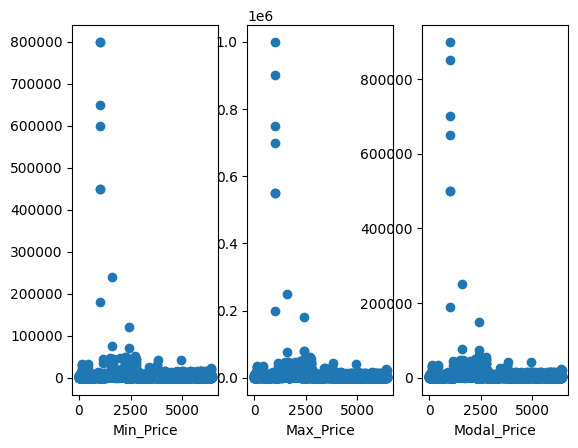

In [6]:
fig,axs = plt.subplots(1,3)

axs[0].scatter(dataSet['msdata:rowOrder'], dataSet['Min_x0020_Price'])
axs[0].set_xlabel('Min_Price')

axs[1].scatter(dataSet['msdata:rowOrder'], dataSet['Max_x0020_Price'])
axs[1].set_xlabel('Max_Price')

axs[2].scatter(dataSet['msdata:rowOrder'], dataSet['Modal_x0020_Price'])
axs[2].set_xlabel('Modal_Price')

plt.show()

Outliers Removal

In [7]:
Min_Price_Mean, Min_Price_Cut_Off = dataSet['Min_x0020_Price'].mean(),dataSet['Min_x0020_Price'].std()*1

Min_Price_Upper_Limit = Min_Price_Mean + Min_Price_Cut_Off
print(Min_Price_Upper_Limit)

#dataSet = dataSet[dataSet['Min_x0020_Price'] <= Min_Price_Upper_Limit]

Max_Price_Mean, Max_Price_Cut_Off = dataSet['Max_x0020_Price'].mean(),dataSet['Max_x0020_Price'].std()*1

Max_Price_Upper_Limit = Max_Price_Mean + Max_Price_Cut_Off
print(Max_Price_Upper_Limit)

#dataSet = dataSet[dataSet['Max_x0020_Price'] <= Max_Price_Upper_Limit]

Modal_Price_Mean, Modal_Price_Cut_Off = dataSet['Modal_x0020_Price'].mean(),dataSet['Modal_x0020_Price'].std()*1

Modal_Price_Upper_Limit = Modal_Price_Mean + Modal_Price_Cut_Off
print(Modal_Price_Upper_Limit)

dataSet = dataSet[(dataSet['Modal_x0020_Price'] <= Modal_Price_Upper_Limit*(0.22)) & (dataSet['Min_x0020_Price'] <= Min_Price_Upper_Limit*(0.22)) & (dataSet['Max_x0020_Price'] <= Max_Price_Upper_Limit*(0.22))]

print("Size:",dataSet.shape)

24432.10635672128
28674.001717753767
26575.531764111514
Size: (5154, 12)


Dataset after removing Outliers

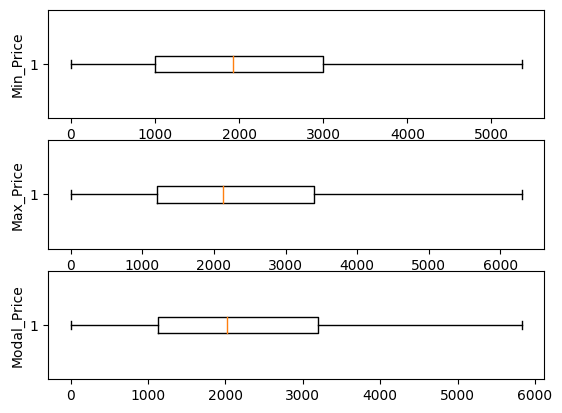

In [8]:
fig,axs = plt.subplots(3,1)

axs[0].boxplot(dataSet['Min_x0020_Price'], vert=False)
axs[0].set_ylabel('Min_Price')

axs[1].boxplot(dataSet['Max_x0020_Price'], vert=False)
axs[1].set_ylabel('Max_Price')

axs[2].boxplot(dataSet['Modal_x0020_Price'], vert=False)
axs[2].set_ylabel('Modal_Price')

plt.show()

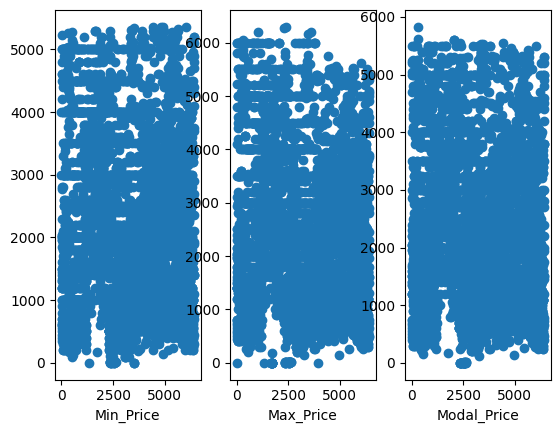

In [9]:
fig,axs = plt.subplots(1,3)

axs[0].scatter(dataSet['msdata:rowOrder'], dataSet['Min_x0020_Price'])
axs[0].set_xlabel('Min_Price')

axs[1].scatter(dataSet['msdata:rowOrder'], dataSet['Max_x0020_Price'])
axs[1].set_xlabel('Max_Price')

axs[2].scatter(dataSet['msdata:rowOrder'], dataSet['Modal_x0020_Price'])
axs[2].set_xlabel('Modal_Price')

plt.show()

Encoding Labels

In [11]:
stateLabel= pd.DataFrame(np.array(dataSet['State']),columns=['OriginalState'])
districtLabel = pd.DataFrame(np.array(dataSet['District']),columns=['OriginalDistrict'])

labelEncoder = pp.LabelEncoder()

dataSet['State'] = labelEncoder.fit_transform(dataSet['State'])
dataSet['District'] = labelEncoder.fit_transform(dataSet['District'])
dataSet['Market'] = labelEncoder.fit_transform(dataSet['Market'])
dataSet['Commodity'] = labelEncoder.fit_transform(dataSet['Commodity'])
dataSet['Variety'] = labelEncoder.fit_transform(dataSet['Variety'])
dataSet['Grade'] = labelEncoder.fit_transform(dataSet['Grade'])

stateLabel = stateLabel.join(dataSet['State'])
districtLabel = districtLabel.join(dataSet['District'])

print(dataSet)
print(stateLabel)

      diffgr:id  msdata:rowOrder  State  District  Market  Commodity  Variety  \
0        Table1                0      0        46     113         60      156   
1        Table2                1      0        46     113         60      157   
2        Table3                2      0        46     113         60      158   
3        Table4                3      0        46     421        131      108   
4        Table5                4      0        46     535        131      137   
...         ...              ...    ...       ...     ...        ...      ...   
6430  Table6431             6430     24       229     144         89      193   
6431  Table6432             6431     24       229     144        103      121   
6432  Table6433             6432     24       229     144        109       64   
6433  Table6434             6433     24       229     144        109      218   
6434  Table6435             6434     24       229     144        131      229   

      Grade Arrival_Date  M

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9152\3943669354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['State'] = labelEncoder.fit_transform(dataSet['State'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9152\3943669354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['District'] = labelEncoder.fit_transform(dataSet['District'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9152\3943669354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra